<a href="https://colab.research.google.com/github/manishramamoorthy/Machine-Learning/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Data Preprocessing

In [3]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data = data.drop_duplicates()

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


IQR (Inter Quantile Range)

In [8]:
# IQR = Q3 - Q1
IQR = data.Hours.quantile(0.75) - data.Hours.quantile(0.25)
IQR

4.7

In [9]:
# Upper_Threshold
Upper_Threshold = data.Hours.quantile(0.75) + (1.5 * IQR)
Upper_Threshold 

14.450000000000001

In [10]:
# Lower_Threshold
Lower_Threshold = data.Hours.quantile(0.25) - (1.5 * IQR)
Lower_Threshold

-4.3500000000000005

EDA

In [12]:
import matplotlib.pyplot as plt

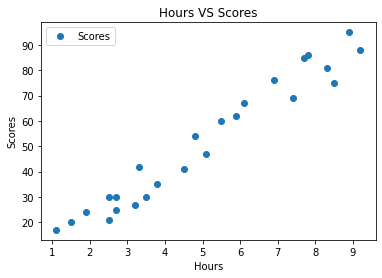

In [14]:
data.plot(x="Hours",y="Scores",style="o")
plt.title("Hours VS Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [19]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Split the Data

In [22]:
X = data[["Hours"]]
y = data["Scores"]

Train and Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

Modelling

In [25]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [26]:
# y = m*X + c
print(LR.intercept_) # c- Values
print(LR.coef_) # m- Values

-0.24030567040756523
[10.41723272]


In [27]:
# 8 Hours Stuides
LR.predict([[8]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([83.09755611])

Compare Actual and Predicted Values

In [29]:
y_pred = LR.predict(X_test)
y_pred

array([49.7624114 , 27.88622268, 95.59823538, 86.22272593, 34.13656232,
       27.88622268, 88.30617247, 92.47306556])

In [30]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
21,54,49.762411
20,30,27.886223
6,88,95.598235
8,81,86.222726
13,42,34.136562
9,25,27.886223
3,75,88.306172
15,95,92.473066


Evaluation Metrics

In [31]:
from sklearn import metrics
print("R2-Score: ",metrics.r2_score(y_test,y_pred))

R2-Score:  0.9298613276530909
